# les bibliothèques

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor


In [ ]:
from google.colab import drive
import os, glob
drive.mount('/content/drive/')
fish = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/C4 - Machine Learning/Fish.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

[]

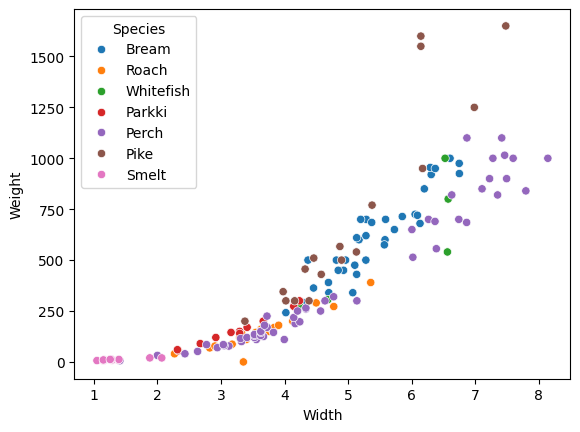

In [ ]:
# display(iris.headdonnées())
display(fish.columns.tolist())
display(fish['Species'].unique())
# test01
sns.scatterplot(data=fish, x='Width',
                y='Weight', hue='Species')
plt.plot()


# Analyse Bivarié

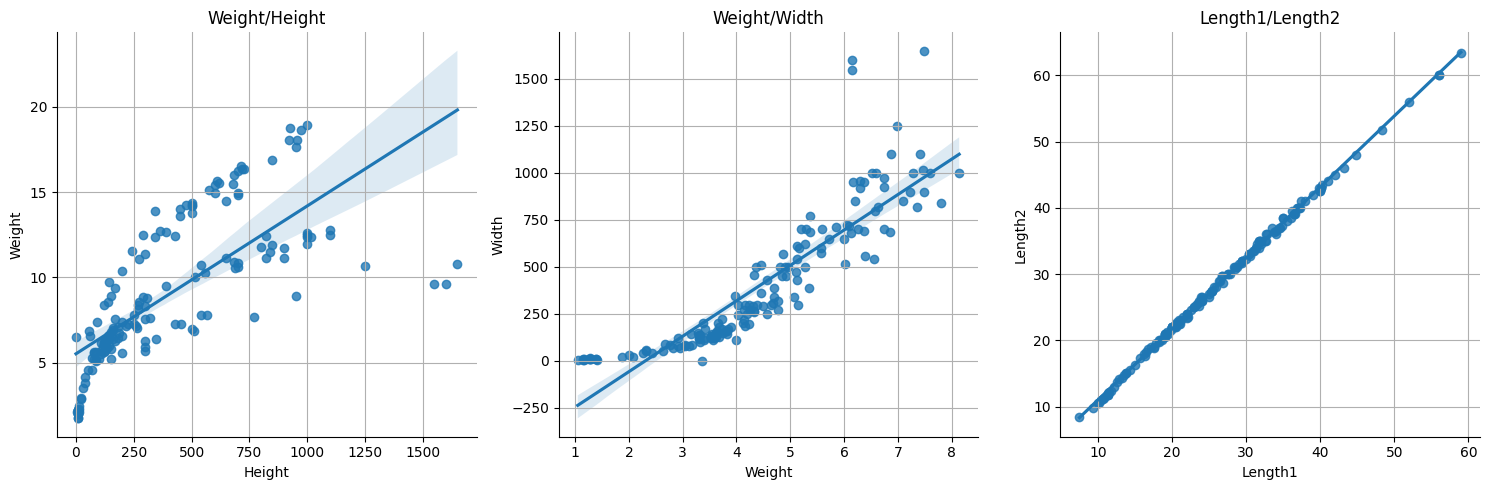

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

plt.subplot(1,3,1)
sns.regplot(x = fish[['Weight']],y  =  fish.Height)
plt.ylabel('Weight')
plt.xlabel('Height')
plt.title('Weight/Height')
plt.grid()
sns.despine()

plt.subplot(1,3,2)
sns.regplot(x = fish[['Width']],y  =  fish.Weight)
plt.ylabel('Width')
plt.xlabel('Weight')
plt.title('Weight/Width')
plt.grid()
sns.despine()

plt.subplot(1,3,3)
res = sns.regplot(x = fish[['Length1']],y  =  fish.Length2)
plt.ylabel('Length2')
plt.xlabel('Length1')
plt.title('Length1/Length2')
plt.grid()
sns.despine()

plt.tight_layout()
plt.show()



In [ ]:
import plotly.express as px
fig = px.scatter_matrix(fish)
fig.show()

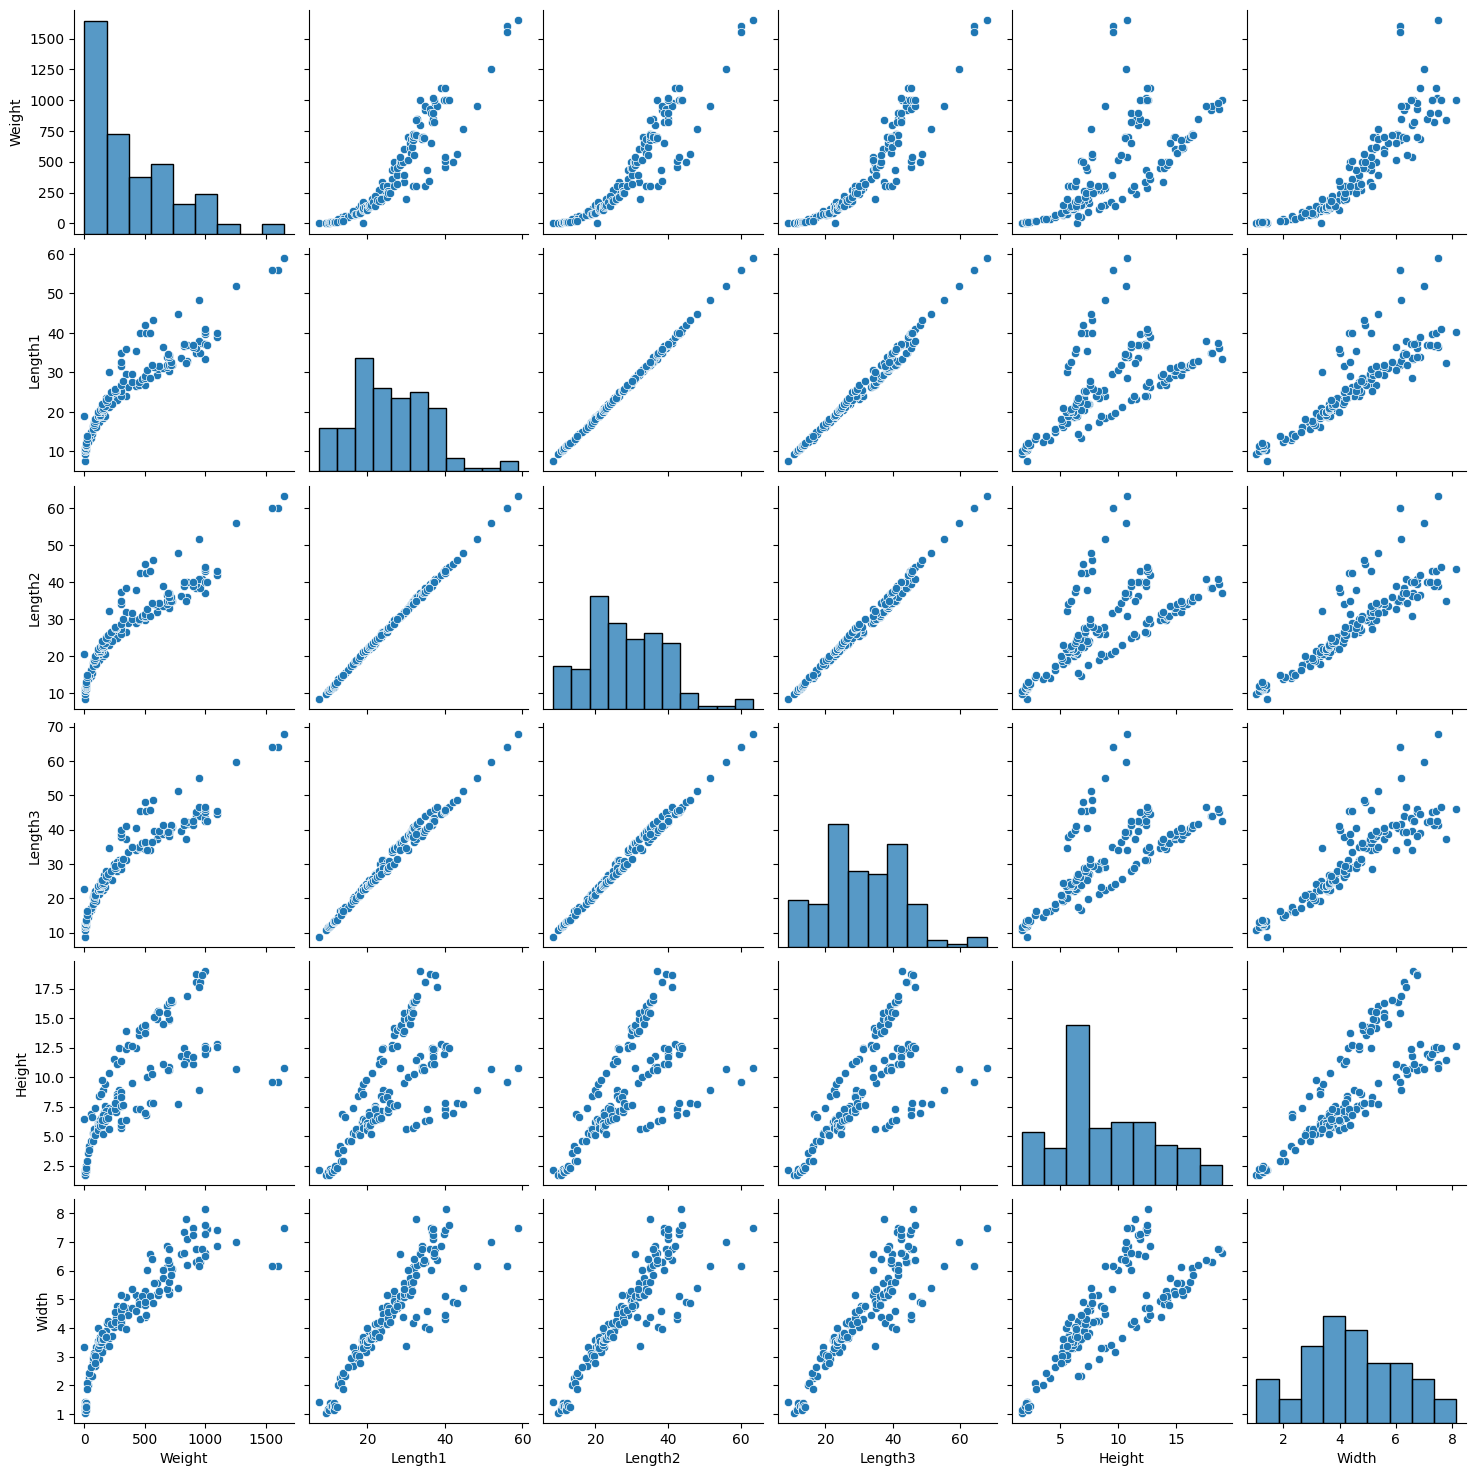

In [ ]:
p = sns.pairplot(fish)
plt.show()

In [ ]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
fish['Species'].replace({'Bream': 0, 'Roach': 1, 'Whitefish': 2, 'Parkki':3,'Perch':4,'Pike':5,'Smelt':6}, inplace=True)
display(fish.corr())


,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.176783,-0.101176,-0.118425,-0.209489,-0.696969,-0.315235
Weight,-0.176783,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.101176,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.118425,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.209489,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.696969,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.315235,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [ ]:
display(fish.corr()["Weight"])

,Weight
Species,-0.176783
Weight,1.000000
Length1,0.915712
Length2,0.918618
Length3,0.923044
Height,0.724345
Width,0.886507


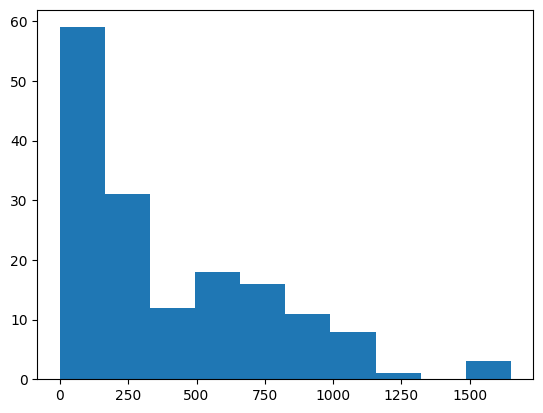

In [ ]:
# Histogramme
plt.hist(fish["Weight"])
plt.show()

In [ ]:
fish.Species.value_counts()

,count
Species,
4,56
0,35
1,20
5,17
6,14
3,11
2,6


<Axes: >

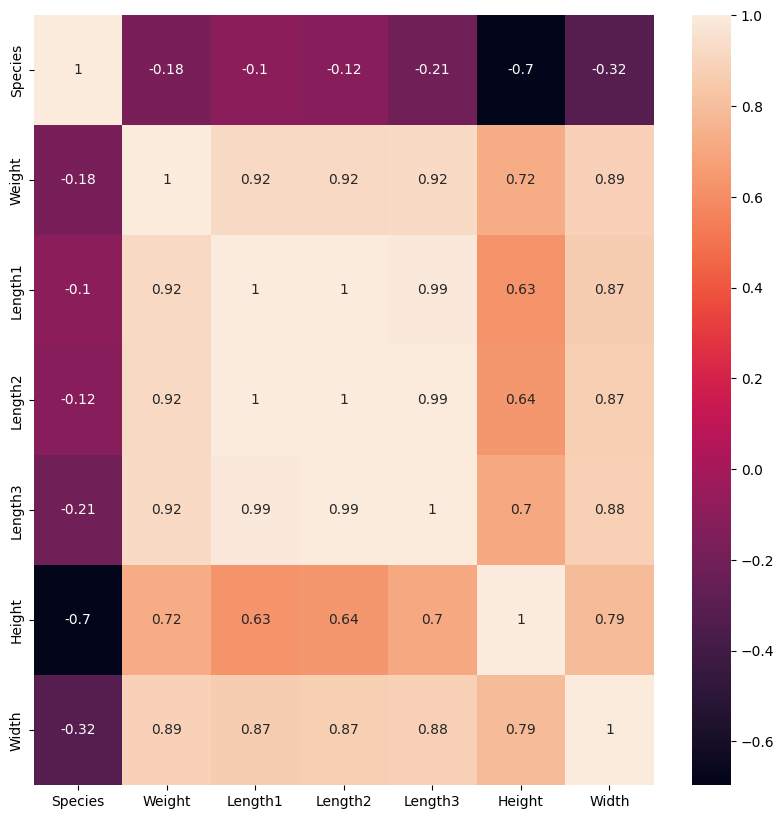

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(fish.corr(), annot=True, ax=ax)

# Regression linéaire



On suppose raisonnablement que Weight est fonction de 'Length1', 'Length2', 'Length3', 'Height', 'Width'.

**Y= aX + B** On pourra dire ainsi que Weight= fonction('Length1', 'Length2', 'Length3', 'Height', 'Width')+ b.


In [ ]:
X = fish[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = fish['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# model linearRegression
reg = LinearRegression()
reg.fit(X, y)

y_pred = reg.predict(X_test)

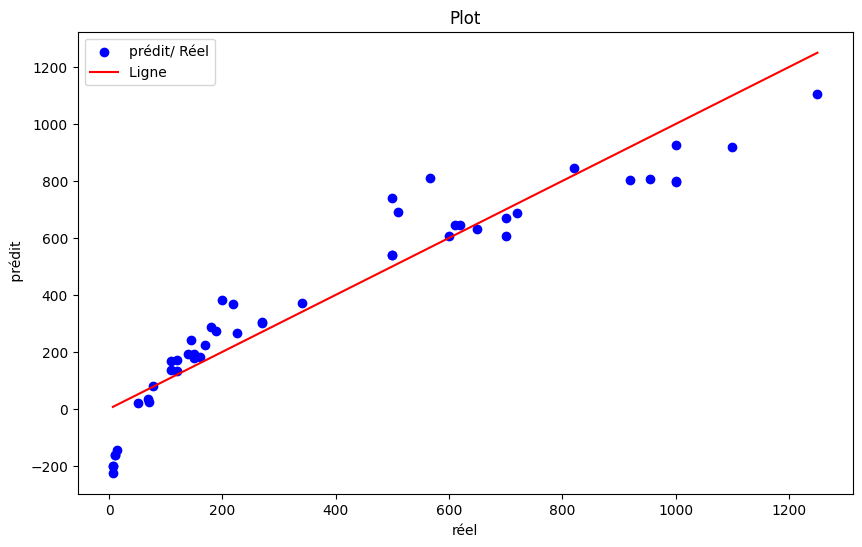

In [ ]:
# Plot des données
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='prédit/ Réel')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Ligne ')
plt.xlabel('réel')
plt.ylabel(' prédit')
plt.title('Plot')
plt.legend()
plt.show()

In [ ]:
# Performance indicators
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: 0.8852731417973672


**SUPPORT VECTOR REGRESSOR**

In [ ]:
#Standariser mes tests et mes trains

scaler=StandardScaler()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



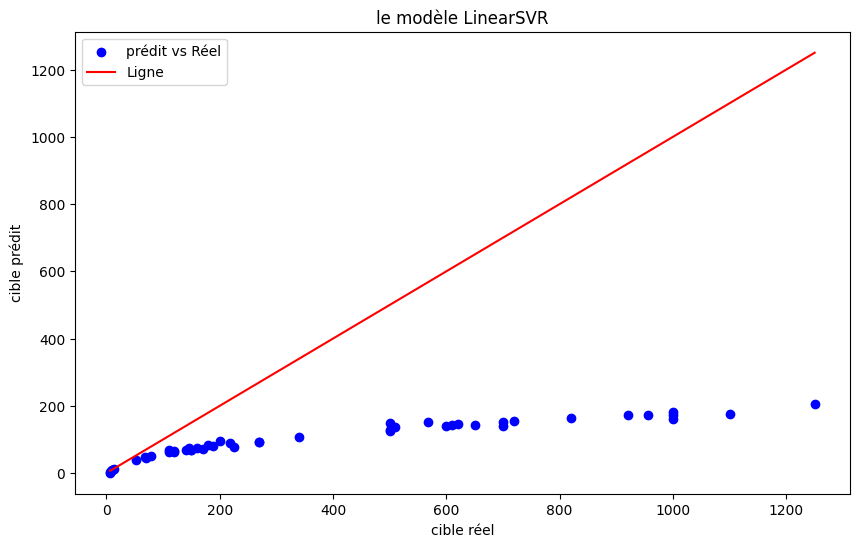

In [ ]:
# Model linear

svr = LinearSVR()

svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

# plot

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='prédit vs Réel')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Ligne')
plt.xlabel('cible réel')
plt.ylabel('cible prédit')
plt.title('le modèle LinearSVR')
plt.legend()
plt.show()

In [ ]:
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: -0.4286629415700187


In [ ]:
# hyper-parameter C
# pour c=0.01
svr = LinearSVR(C=0.01)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

print('R2 Score:', r2_score(y_test, y_pred))

# pour c=0.1
svr = LinearSVR(C=10)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
print('R2 Score:', r2_score(y_test, y_pred))

# pour c=1
svr = LinearSVR(C=100)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
print('R2 Score:', r2_score(y_test, y_pred))

#pour c=100
svr = LinearSVR(C=100)
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)

print('R2 Score:', r2_score(y_test, y_pred))
#

R2 Score: -1.2464795662794117
R2 Score: 0.8255642082969562
R2 Score: 0.86063427305622
R2 Score: 0.8610109896868533


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



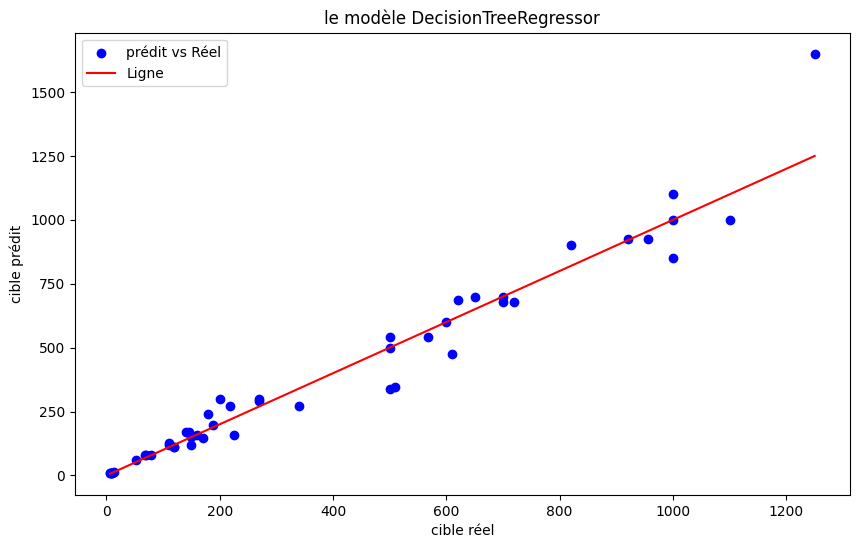

R2 Score: 0.9450805608783686
R2 Score: 0.9580790033665477
R2 Score: 0.9573257342106193


In [ ]:
# DecisionTreeRegressor

tree=DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred = tree.predict(X_test_scaled)

# plot

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='prédit vs Réel')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Ligne')
plt.xlabel('cible réel')
plt.ylabel('cible prédit')
plt.title('le modèle DecisionTreeRegressor')
plt.legend()
plt.show()

print('R2 Score:', r2_score(y_test, y_pred))

# pour max_depth=10
reg=DecisionTreeRegressor(max_depth=10)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)

print('R2 Score:', r2_score(y_test, y_pred))

#pour max_deph=
reg=DecisionTreeRegressor(max_depth=100)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print('R2 Score:', r2_score(y_test, y_pred))
